<a href="https://colab.research.google.com/github/SLIIT-FacultyOfComputing/assignment01-HansakaDilshanJayawardana/blob/main/IT19972176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To store and process in a dataframe
import pandas as pd
# advancec ploting
import seaborn as sns
#For ploting graphs
import matplotlib.pyplot as plt
#For numerical analysis
import numpy as np
from numpy import argmax, array_equal
#Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
#Train test split
from sklearn.model_selection import train_test_split
#Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
#Utility functions
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from imgaug import augmenters
from random import randint

In [2]:
#Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
#Install Kaggle
!pip install -q kaggle

In [4]:
#To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hansakajayawardana","key":"8f6f6955a13e27d07e5ccf2037da13b8"}'}

In [5]:
#To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 55% 38.0M/68.8M [00:00<00:00, 205MB/s]
100% 68.8M/68.8M [00:00<00:00, 244MB/s]


In [7]:
# Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
# Load Data 
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')
x_train = train[list(train.columns)[1:]].values
x_test = test[list(test.columns)[1:]].values

In [ ]:
#Define variables
input_size = 784

# Normalizing all values between 0 and 1
x_train = x_train / 255
x_test - x_test / 255

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99607843,
        0.        ],
       [0.        , 0.99607843, 2.98823529, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Reshaping(Flatten the images into vectors of size 784)
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Define variables
layer_2_size = 2400

input_img = Input(shape=(input_size,))

# Encoded representation of the input
encode_layer1 = Dense(2900, activation='relu')(input_img)
encode_layer2 = Dense(layer_2_size, activation='relu')(encode_layer1)
encode_layer3 = Dense(1900, activation='relu')(encode_layer2)

# Latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

# Dencoded representation of the output
decode_layer1 = Dense(1900, activation='relu')(latent_view)
decode_layer2 = Dense(layer_2_size, activation='relu')(decode_layer1)
decode_layer3 = Dense(2900, activation='relu')(decode_layer2)

# Map input to its reconstruction
output_img  = Dense(input_size)(decode_layer3)

autoencoder = Model(input_img, output_img)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 2900)              2276500   
                                                                 
 dense_1 (Dense)             (None, 2400)              6962400   
                                                                 
 dense_2 (Dense)             (None, 1900)              4561900   
                                                                 
 dense_3 (Dense)             (None, 10)                19010     
                                                                 
 dense_4 (Dense)             (None, 1900)              20900     
                                                                 
 dense_5 (Dense)             (None, 2400)              456240

In [ ]:
#Using Adam optimizer and Mean squared error loss function
autoencoder.compile(optimizer='adam', loss='mse')

#Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=2048, validation_data=(x_test, x_test))

Epoch 1/50
30/30 [==============================] - 187s 6s/step - loss: 0.0449 - val_loss: 13280.7939
Epoch 2/50
30/30 [==============================] - 173s 6s/step - loss: 0.0185 - val_loss: 13282.5010
Epoch 3/50
30/30 [==============================] - 174s 6s/step - loss: 0.0158 - val_loss: 13284.7812
Epoch 4/50
30/30 [==============================] - 174s 6s/step - loss: 0.0146 - val_loss: 13285.9902
Epoch 5/50
30/30 [==============================] - 172s 6s/step - loss: 0.0140 - val_loss: 13290.2939
Epoch 6/50
30/30 [==============================] - 174s 6s/step - loss: 0.0136 - val_loss: 13284.7676
Epoch 7/50
30/30 [==============================] - 174s 6s/step - loss: 0.0131 - val_loss: 13280.6885
Epoch 8/50
30/30 [==============================] - 172s 6s/step - loss: 0.0130 - val_loss: 13282.3682
Epoch 9/50
30/30 [==============================] - 173s 6s/step - loss: 0.0128 - val_loss: 13281.2588
Epoch 10/50
30/30 [==============================] - 173s 6s/step - loss:

In [ ]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 18s 55ms/step


In [ ]:
from PIL import Image 

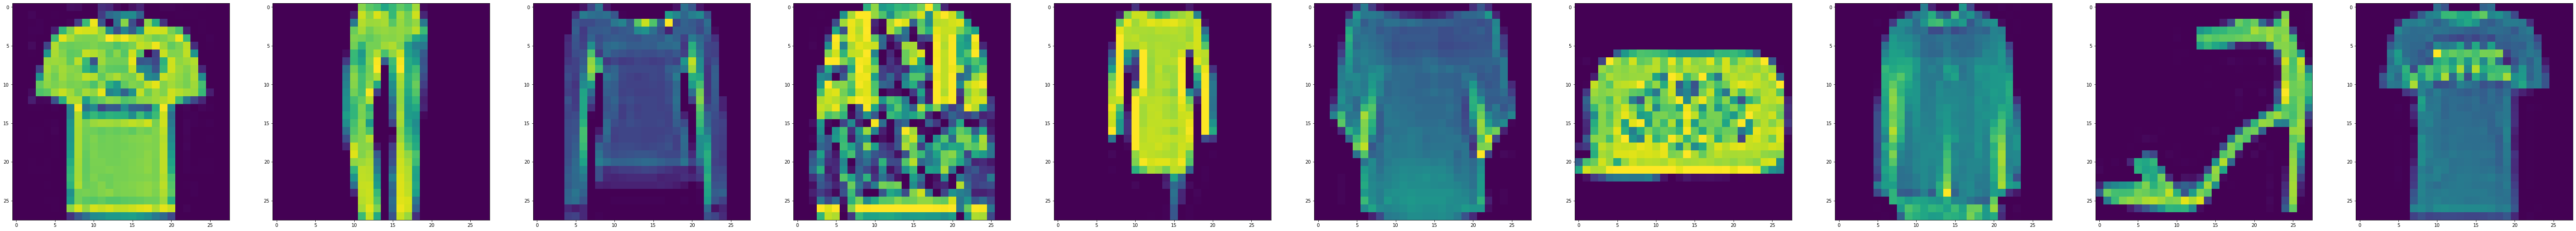

In [ ]:
#Display Original
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(x_test[i].reshape(28, 28))
plt.show()

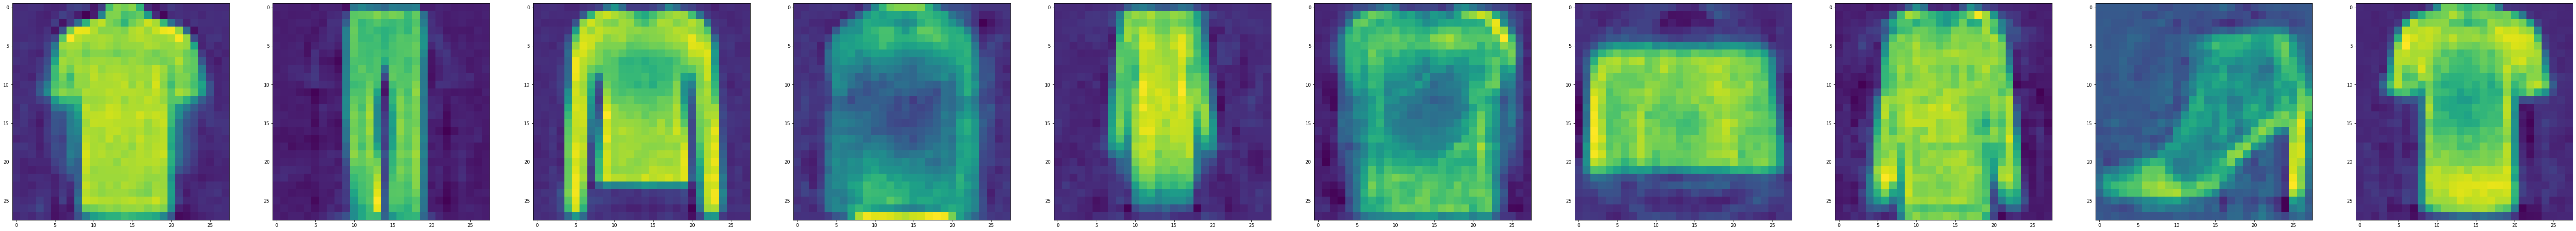

In [ ]:
#Display Reconstructed Images
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(reconstructed[i].reshape(28, 28))
plt.show()